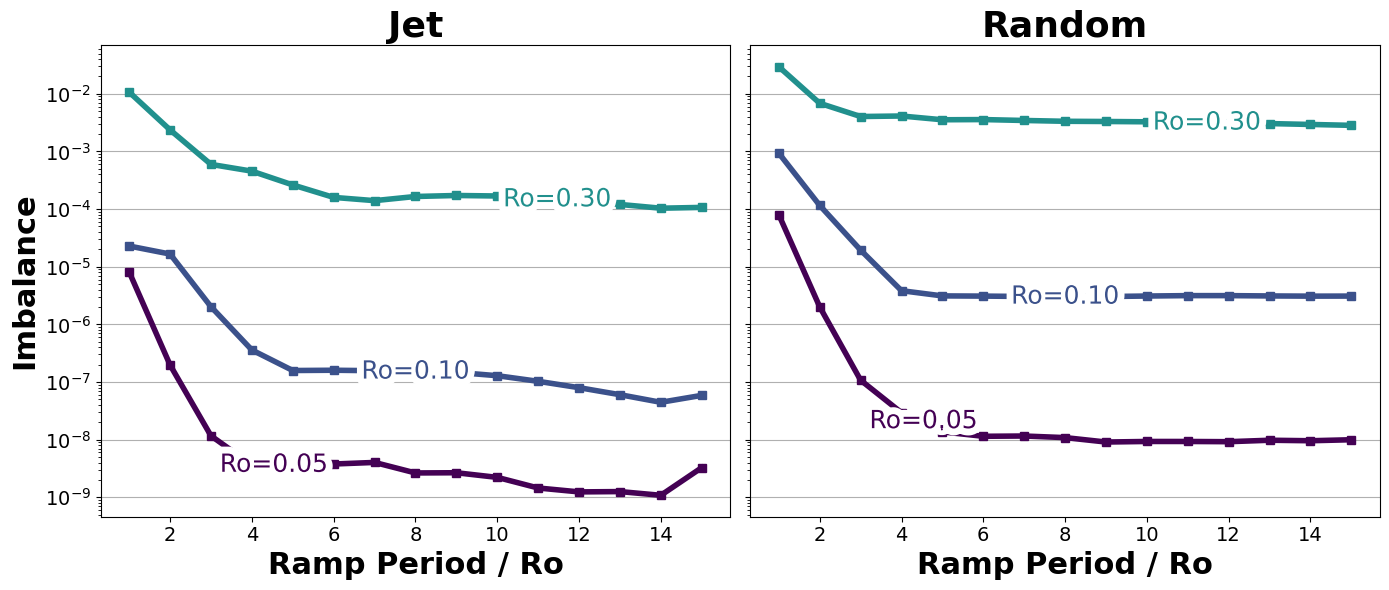

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from labellines import labelLines

ds = xr.load_dataset("../data/ramp_period_sw.nc", decode_timedelta=False)

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(14, 6), sharey=True)

colors = plt.cm.viridis_r(np.linspace(0.5, 1, len(ds.rossby_number)))[::-1]

for ax, ic in zip(axs, ds.initial_condition):
    for ro, col in zip(ds.rossby_number, colors):
        ds.sel({"initial_condition": ic, "rossby_number": ro}).imbalance.plot(
            ax=ax, c=col, lw=4, marker="s", label=f"Ro={ro:.2f}")

    # Create inline labels
    labelLines(ax.get_lines(), zorder=2.5, align=False,
            fontsize=18, outline_width=10)

    ax.tick_params(labelsize=14)
    ax.set_yscale("log")
    ax.grid(axis="y")
    ax.set_title(ic.item().capitalize(), fontsize=26, fontweight="bold")
    ax.set_xlabel("Ramp Period / Ro", fontsize=22, fontweight="bold")
    ax.set_ylabel("")

axs[0].set_ylabel("Imbalance", fontsize=22, fontweight="bold")

plt.savefig("../figures/ramp_period.png", dpi=200)